/tmp/ipykernel_80911/2257713241.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_80911/2257713241.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Close'].resample('M').mean()


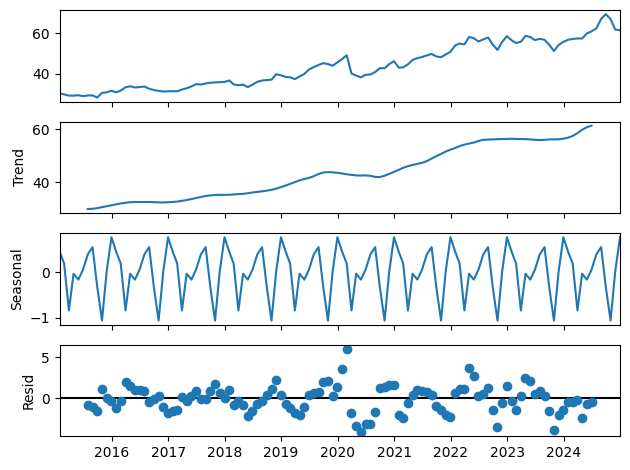

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Example: Coca-Cola (KO)
ticker = "KO"
df = yf.download(ticker, start="2015-01-01", end="2025-01-01")

# Resample to monthly average close
monthly = df['Close'].resample('M').mean()

# Seasonal decomposition
result = seasonal_decompose(monthly, model='additive', period=12)
result.plot()
plt.show()

## Analiza stacjonarności szeregu czasowego

Stacjonarność jest kluczową właściwością szeregów czasowych. Szereg jest stacjonarny, gdy:
- Średnia jest stała w czasie
- Wariancja jest stała w czasie
- Kowariancja zależy tylko od opóźnienia, nie od czasu

Zbadamy stacjonarność danych Coca-Cola używając:
1. Testu ADF (Augmented Dickey-Fuller)
2. Testu KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
3. Wizualizacji statystyk kroczących (rolling statistics)

In [4]:
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np

def test_stationarity(timeseries, title=''):
    """
    Funkcja do testowania stacjonarności szeregu czasowego
    """
    print(f'\n{"="*60}')
    print(f'Test stacjonarności dla: {title}')
    print(f'{"="*60}\n')
    
    # Test ADF (Augmented Dickey-Fuller)
    print('Test ADF (Augmented Dickey-Fuller):')
    print('-' * 50)
    adf_result = adfuller(timeseries.dropna(), autolag='AIC')
    
    print(f'Statystyka ADF: {adf_result[0]:.6f}')
    print(f'p-value: {adf_result[1]:.6f}')
    print(f'Wartości krytyczne:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value:.3f}')
    
    if adf_result[1] <= 0.05:
        print('\n✓ Szereg jest STACJONARNY (p-value <= 0.05)')
    else:
        print('\n✗ Szereg jest NIESTACJONARNY (p-value > 0.05)')
    
    # Test KPSS
    print('\n\nTest KPSS (Kwiatkowski-Phillips-Schmidt-Shin):')
    print('-' * 50)
    kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')
    
    print(f'Statystyka KPSS: {kpss_result[0]:.6f}')
    print(f'p-value: {kpss_result[1]:.6f}')
    print(f'Wartości krytyczne:')
    for key, value in kpss_result[3].items():
        print(f'   {key}: {value:.3f}')
    
    if kpss_result[1] >= 0.05:
        print('\n✓ Szereg jest STACJONARNY (p-value >= 0.05)')
    else:
        print('\n✗ Szereg jest NIESTACJONARNY (p-value < 0.05)')
    
    print('\n' + '='*60)

In [5]:
# Test stacjonarności dla oryginalnych danych miesięcznych
test_stationarity(monthly, title='Miesięczne ceny zamknięcia Coca-Cola (oryginalne dane)')


Test stacjonarności dla: Miesięczne ceny zamknięcia Coca-Cola (oryginalne dane)

Test ADF (Augmented Dickey-Fuller):
--------------------------------------------------
Statystyka ADF: -0.326194
p-value: 0.921712
Wartości krytyczne:
   1%: -3.488
   5%: -2.887
   10%: -2.580

✗ Szereg jest NIESTACJONARNY (p-value > 0.05)


Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
--------------------------------------------------
Statystyka KPSS: 1.750012
p-value: 0.010000
Wartości krytyczne:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

✗ Szereg jest NIESTACJONARNY (p-value < 0.05)



/tmp/ipykernel_80911/4001016633.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')


### Wizualizacja stacjonarności - statystyki kroczące

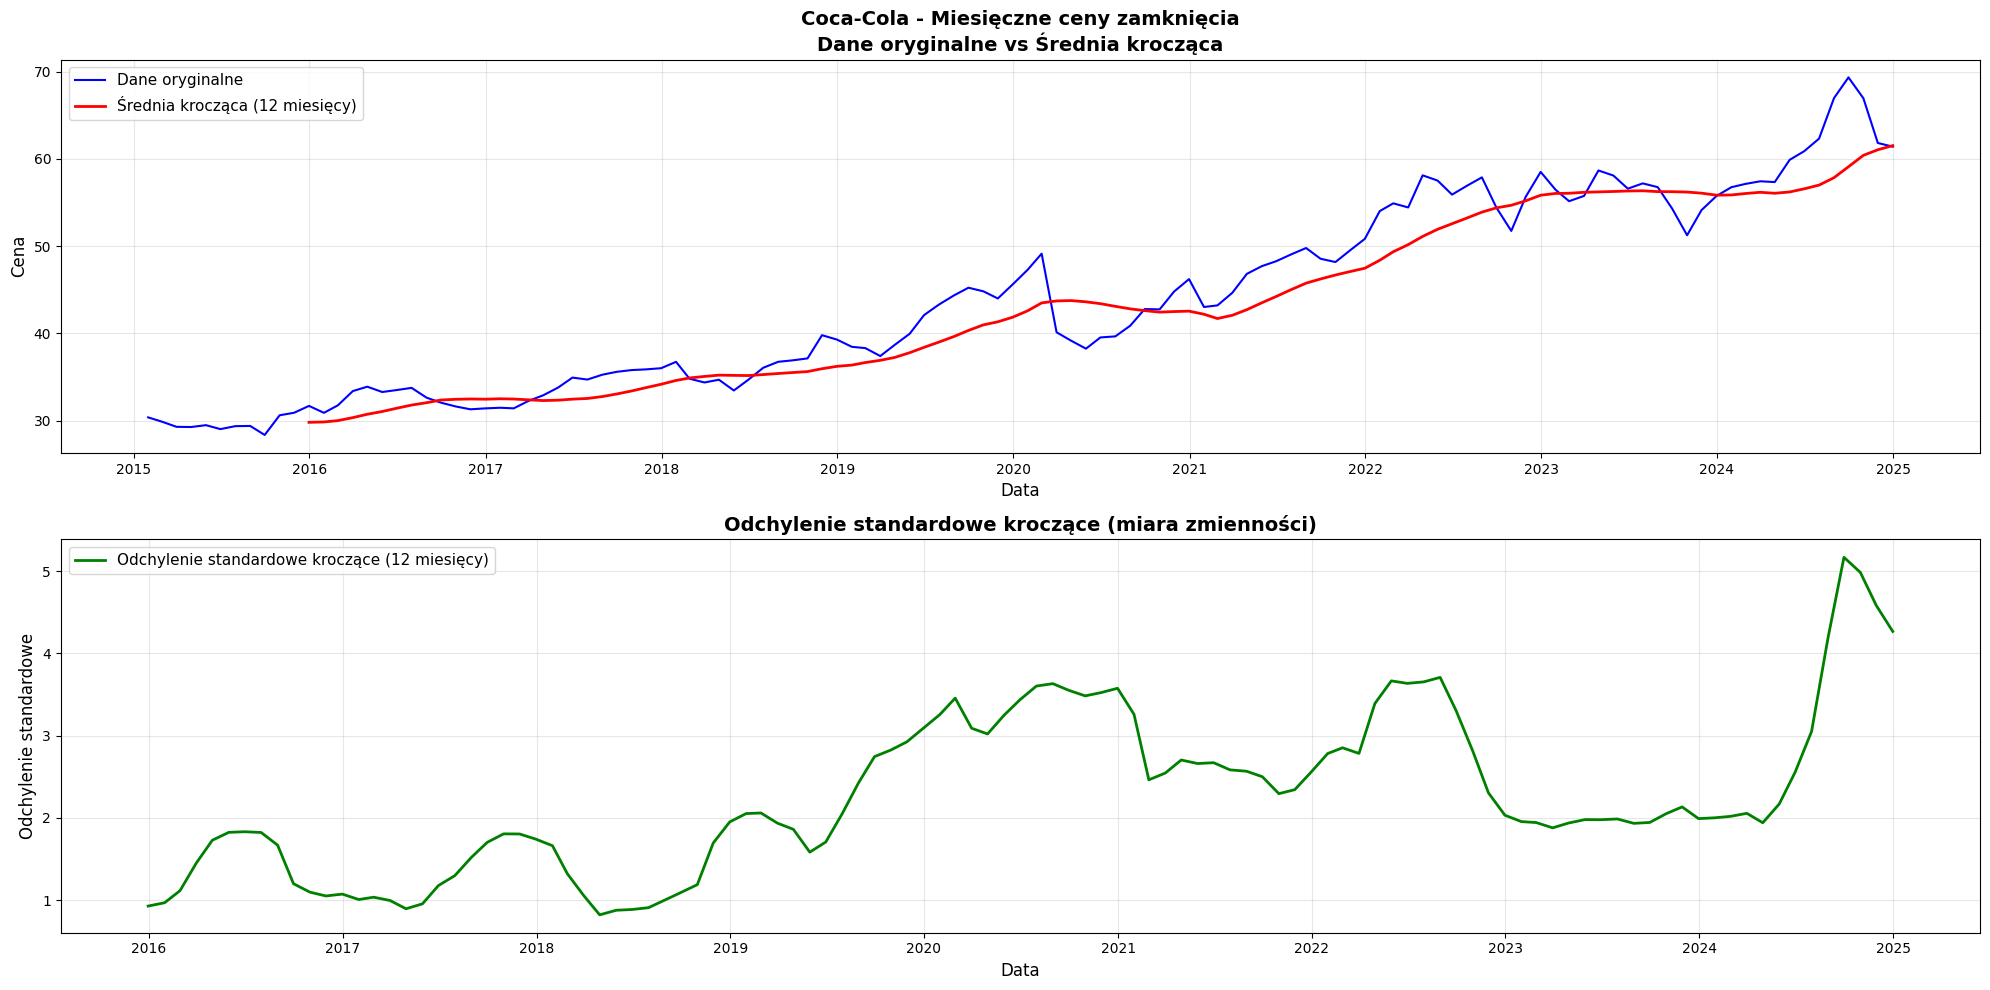

In [6]:
def plot_rolling_statistics(timeseries, window=12, title=''):
    """
    Wizualizacja średniej i odchylenia standardowego kroczącego
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    
    # Obliczenie statystyk kroczących
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # Wykres 1: Dane oryginalne ze średnią kroczącą
    ax1.plot(timeseries, color='blue', label='Dane oryginalne', linewidth=1.5)
    ax1.plot(rolling_mean, color='red', label=f'Średnia krocząca ({window} miesięcy)', linewidth=2)
    ax1.set_title(f'{title}\nDane oryginalne vs Średnia krocząca', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Data', fontsize=12)
    ax1.set_ylabel('Cena', fontsize=12)
    ax1.legend(loc='best', fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Wykres 2: Odchylenie standardowe kroczące
    ax2.plot(rolling_std, color='green', label=f'Odchylenie standardowe kroczące ({window} miesięcy)', linewidth=2)
    ax2.set_title('Odchylenie standardowe kroczące (miara zmienności)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Data', fontsize=12)
    ax2.set_ylabel('Odchylenie standardowe', fontsize=12)
    ax2.legend(loc='best', fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Wizualizacja dla danych miesięcznych
plot_rolling_statistics(monthly, window=12, title='Coca-Cola - Miesięczne ceny zamknięcia')

### Test stacjonarności dla różnicowanych danych

Jeśli dane oryginalne są niestacjonarne, różnicowanie może pomóc w uzyskaniu stacjonarności.

In [7]:
# Różnicowanie pierwszego rzędu (first difference)
monthly_diff = monthly.diff().dropna()

# Test stacjonarności dla różnicowanych danych
test_stationarity(monthly_diff, title='Coca-Cola - Dane po różnicowaniu (1st difference)')


Test stacjonarności dla: Coca-Cola - Dane po różnicowaniu (1st difference)

Test ADF (Augmented Dickey-Fuller):
--------------------------------------------------
Statystyka ADF: -9.203890
p-value: 0.000000
Wartości krytyczne:
   1%: -3.488
   5%: -2.887
   10%: -2.580

✓ Szereg jest STACJONARNY (p-value <= 0.05)


Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
--------------------------------------------------
Statystyka KPSS: 0.049708
p-value: 0.100000
Wartości krytyczne:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

✓ Szereg jest STACJONARNY (p-value >= 0.05)



/tmp/ipykernel_80911/4001016633.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')


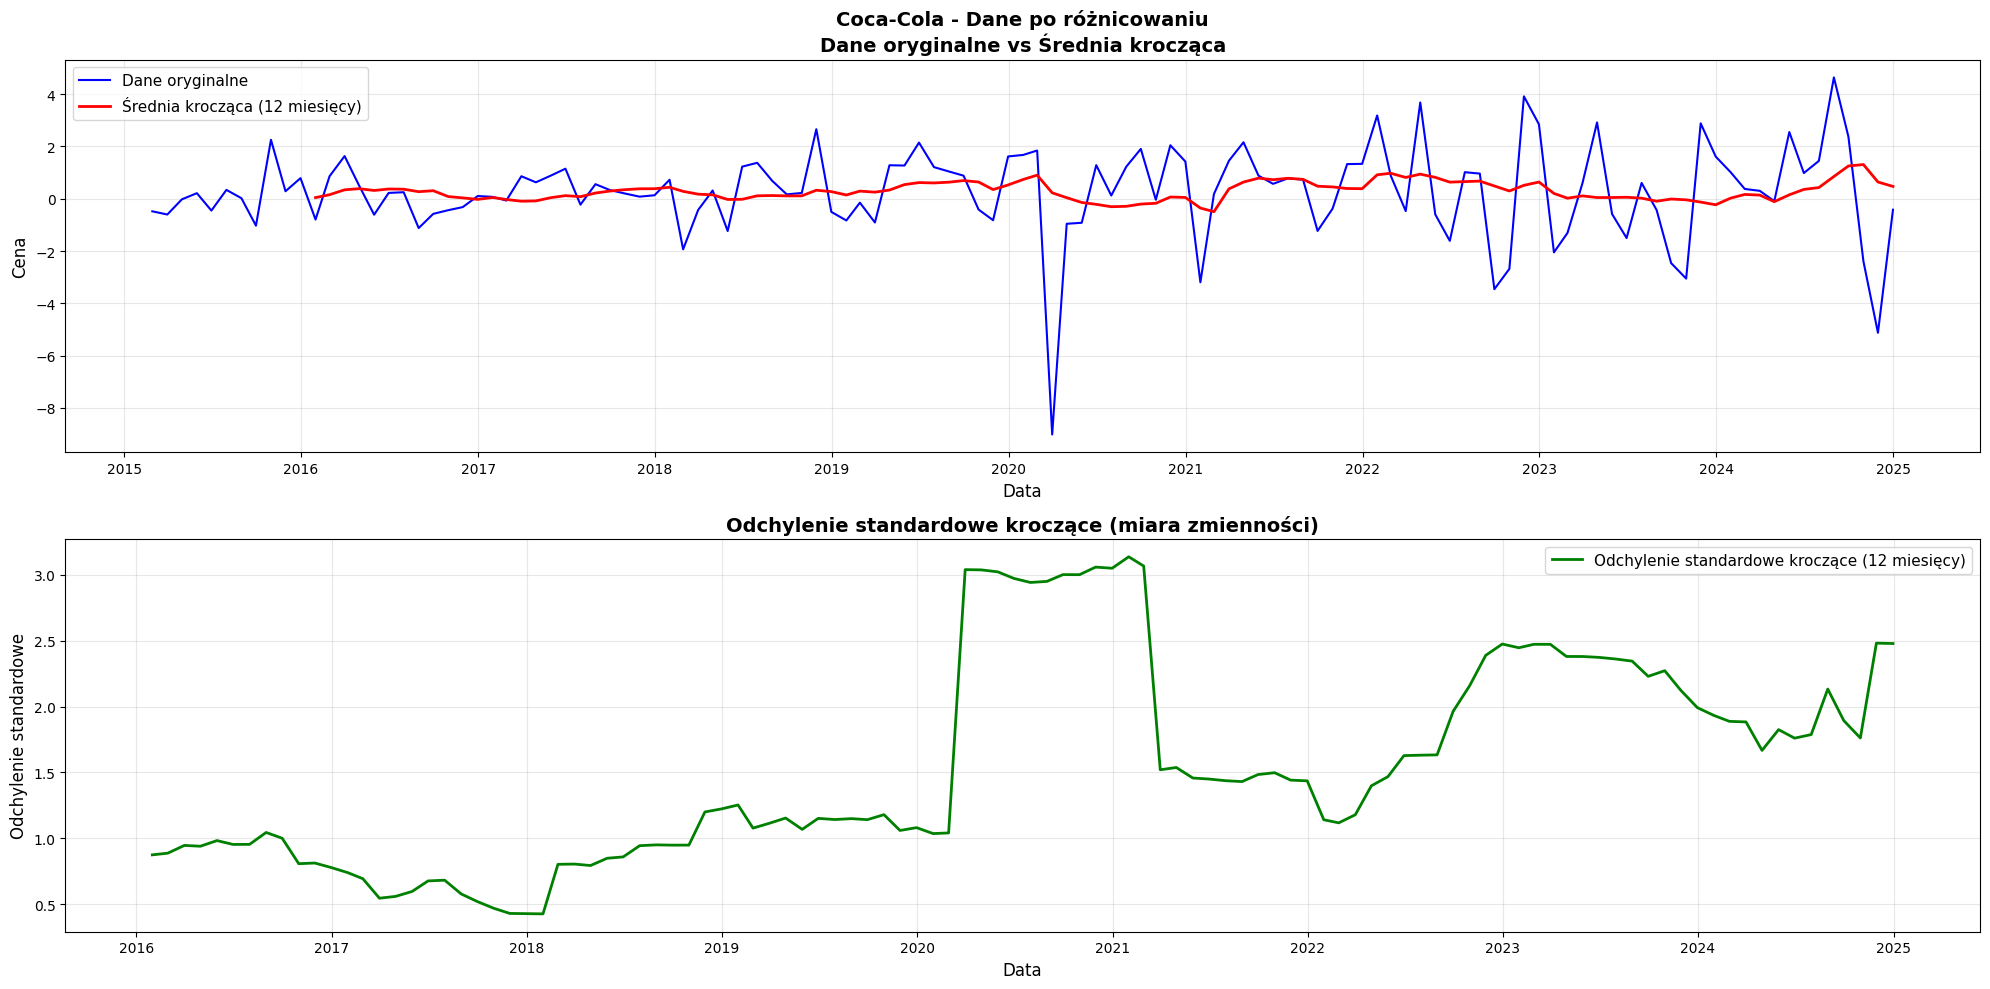

In [8]:
# Wizualizacja danych różnicowanych
plot_rolling_statistics(monthly_diff, window=12, title='Coca-Cola - Dane po różnicowaniu')

### Porównanie danych oryginalnych i różnicowanych

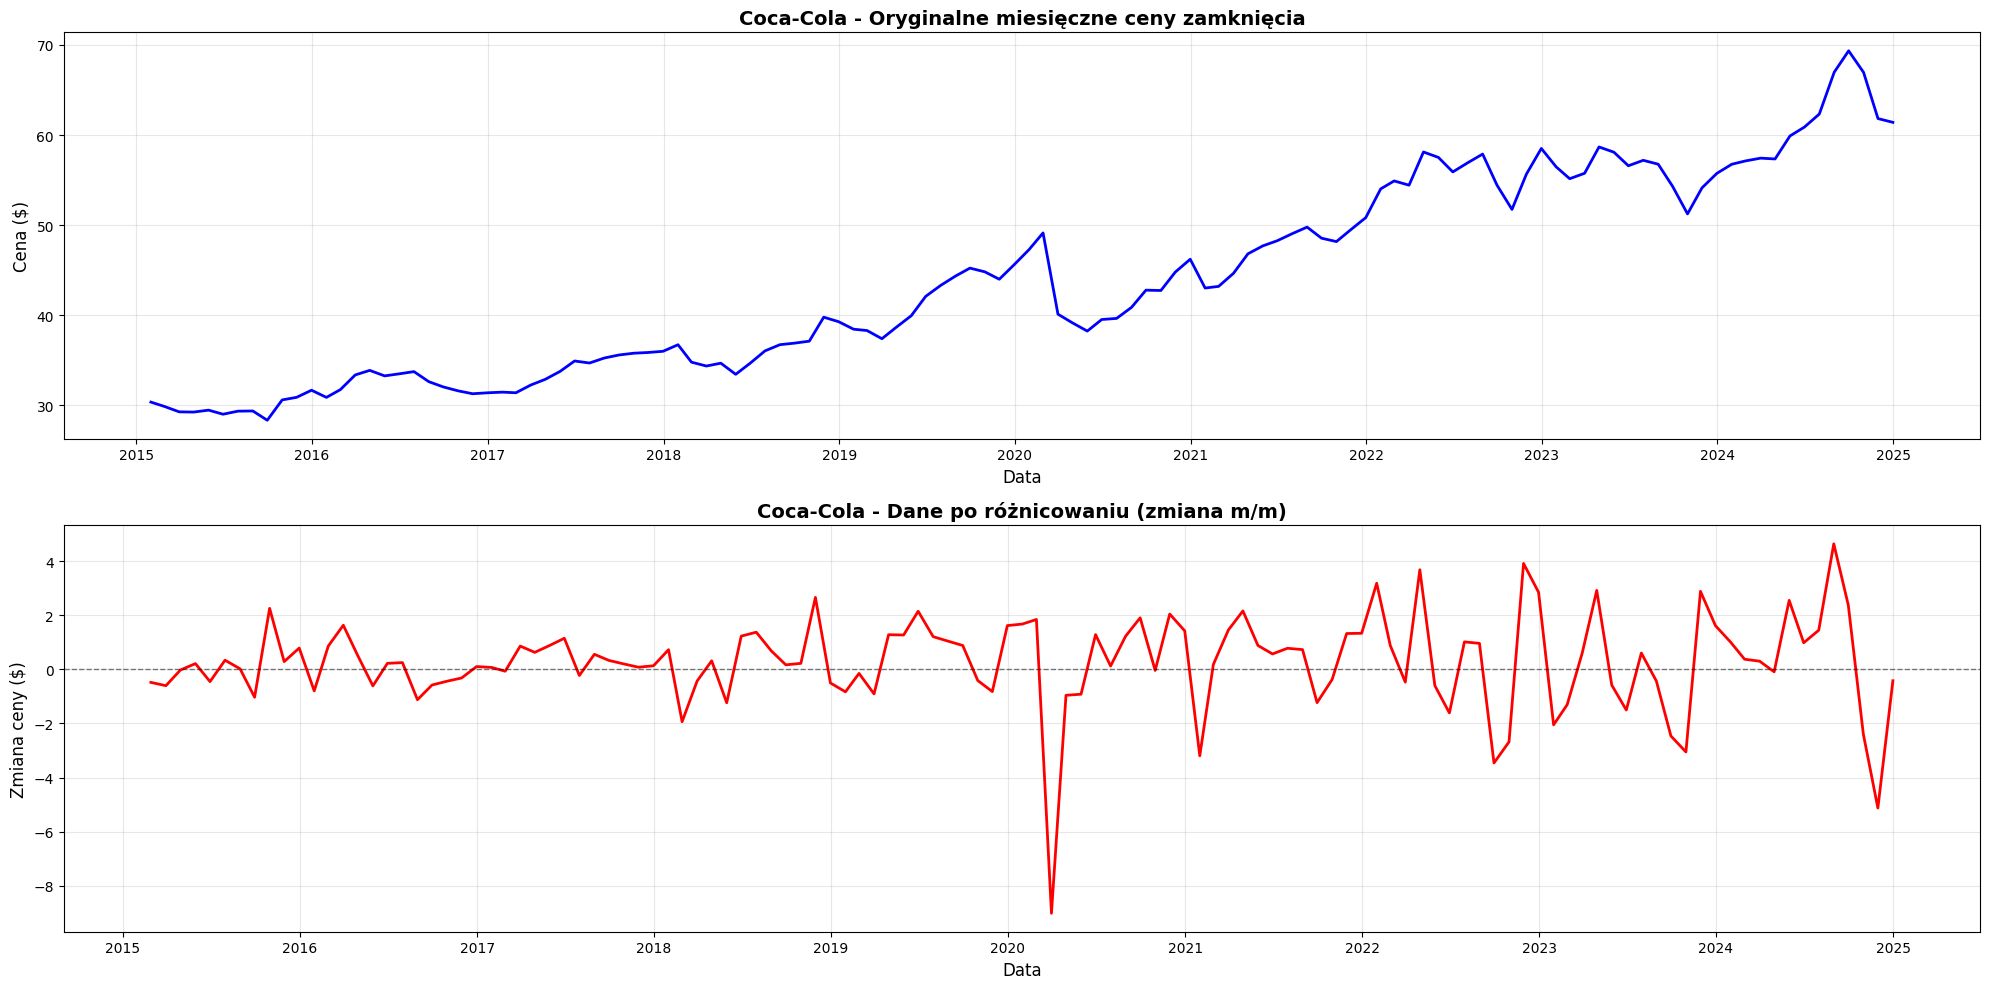

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Wykres 1: Dane oryginalne
ax1.plot(monthly, color='blue', linewidth=2)
ax1.set_title('Coca-Cola - Oryginalne miesięczne ceny zamknięcia', fontsize=14, fontweight='bold')
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('Cena ($)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Wykres 2: Dane różnicowane
ax2.plot(monthly_diff, color='red', linewidth=2)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_title('Coca-Cola - Dane po różnicowaniu (zmiana m/m)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Data', fontsize=12)
ax2.set_ylabel('Zmiana ceny ($)', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Test stacjonarności dla logarytmicznych zwrotów

Alternatywna metoda stabilizacji wariancji - logarytmiczne zwroty (log returns).

In [10]:
# Logarytmiczne zwroty
monthly_log_returns = np.log(monthly / monthly.shift(1)).dropna()

# Test stacjonarności dla logarytmicznych zwrotów
test_stationarity(monthly_log_returns, title='Coca-Cola - Logarytmiczne zwroty')


Test stacjonarności dla: Coca-Cola - Logarytmiczne zwroty

Test ADF (Augmented Dickey-Fuller):
--------------------------------------------------
Statystyka ADF: -8.649968
p-value: 0.000000
Wartości krytyczne:
   1%: -3.488
   5%: -2.887
   10%: -2.580

✓ Szereg jest STACJONARNY (p-value <= 0.05)


Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
--------------------------------------------------
Statystyka KPSS: 0.031232
p-value: 0.100000
Wartości krytyczne:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

✓ Szereg jest STACJONARNY (p-value >= 0.05)



/tmp/ipykernel_80911/4001016633.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')


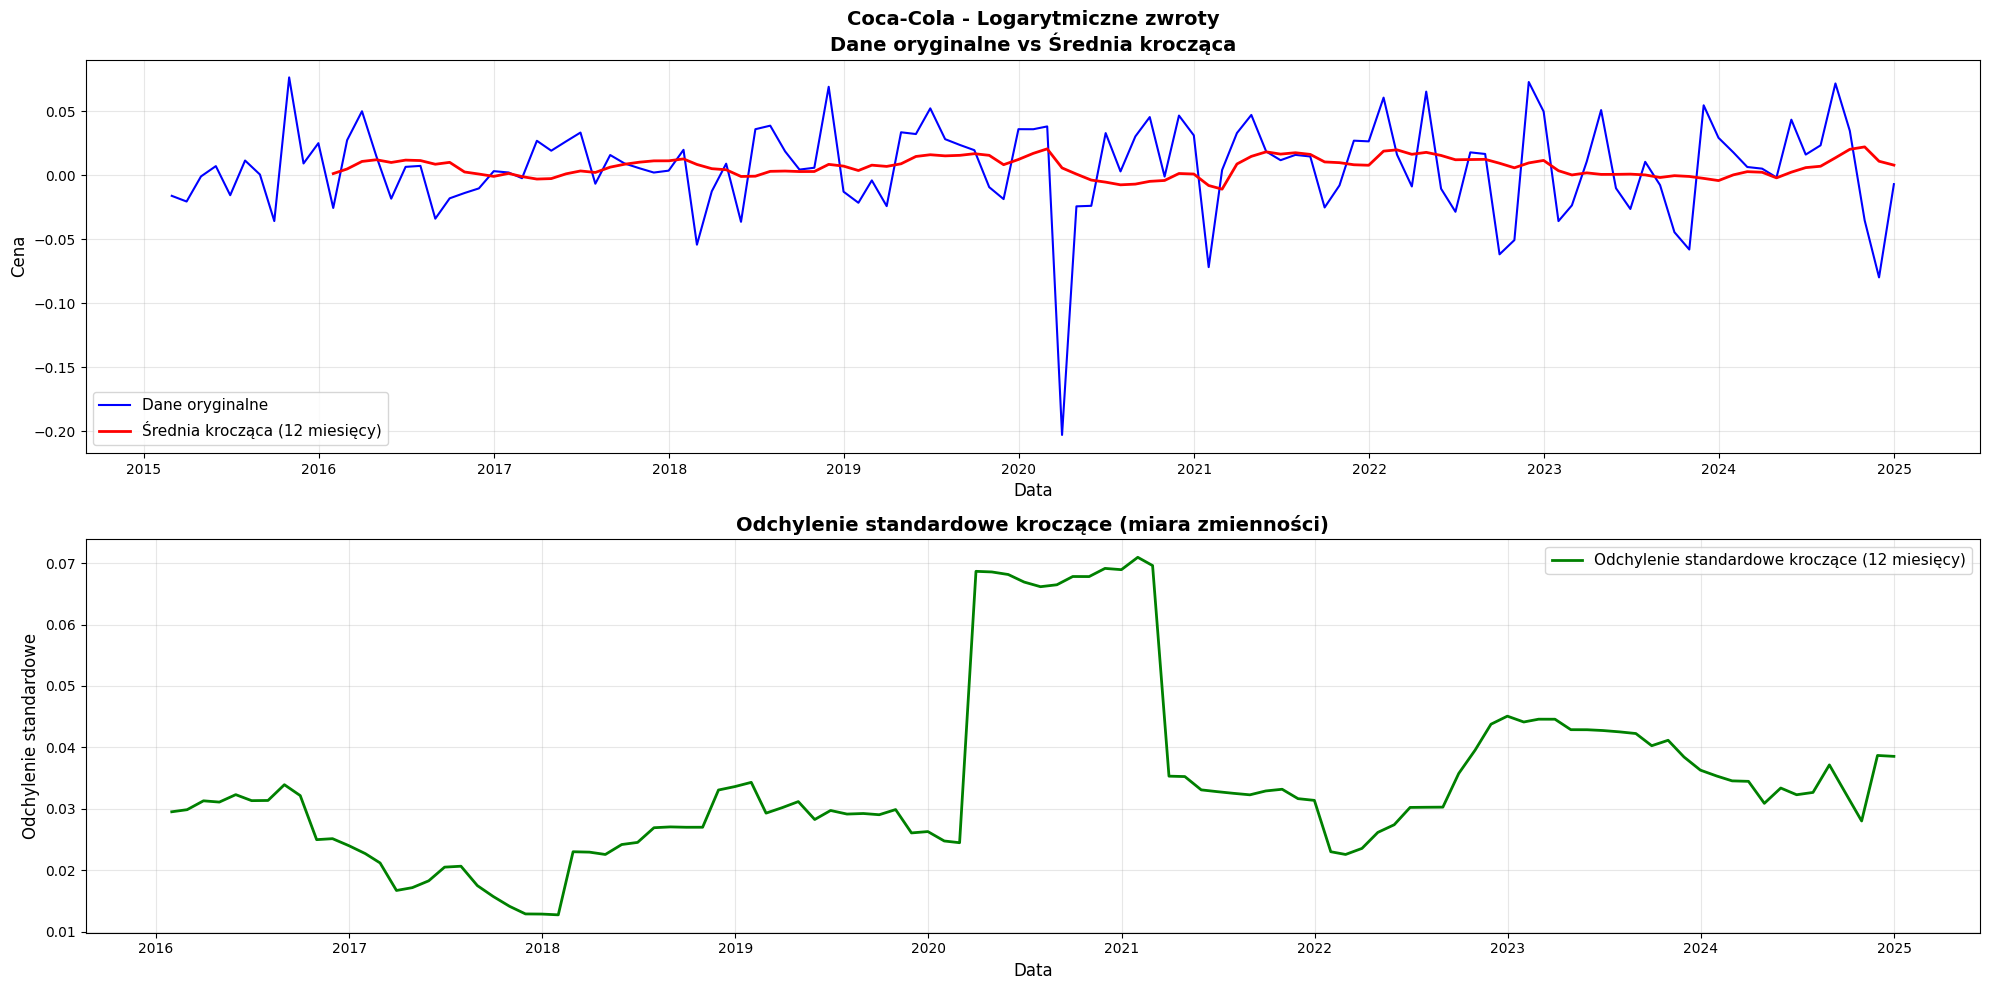

In [11]:
# Wizualizacja logarytmicznych zwrotów
plot_rolling_statistics(monthly_log_returns, window=12, title='Coca-Cola - Logarytmiczne zwroty')

### Podsumowanie wyników testów stacjonarności

In [12]:
import pandas as pd

# Zbieranie wyników testów
def get_test_results(timeseries):
    adf_result = adfuller(timeseries.dropna(), autolag='AIC')
    kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')
    
    return {
        'ADF statystyka': adf_result[0],
        'ADF p-value': adf_result[1],
        'ADF stacjonarny': 'TAK' if adf_result[1] <= 0.05 else 'NIE',
        'KPSS statystyka': kpss_result[0],
        'KPSS p-value': kpss_result[1],
        'KPSS stacjonarny': 'TAK' if kpss_result[1] >= 0.05 else 'NIE'
    }

# Tworzenie tabeli podsumowującej
summary_df = pd.DataFrame({
    'Oryginalne dane': get_test_results(monthly),
    'Po różnicowaniu': get_test_results(monthly_diff),
    'Log. zwroty': get_test_results(monthly_log_returns)
}).T

print('\n' + '='*80)
print('PODSUMOWANIE TESTÓW STACJONARNOŚCI - COCA-COLA')
print('='*80)
print(summary_df.to_string())
print('='*80)

print('\n\nINTERPRETACJA:')
print('-' * 80)
print('Test ADF (Augmented Dickey-Fuller):')
print('  • H0: Szereg ma pierwiastek jednostkowy (jest niestacjonarny)')
print('  • H1: Szereg jest stacjonarny')
print('  • Jeśli p-value <= 0.05, odrzucamy H0 → szereg JEST stacjonarny')
print()
print('Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin):')
print('  • H0: Szereg jest stacjonarny')
print('  • H1: Szereg ma pierwiastek jednostkowy (jest niestacjonarny)')
print('  • Jeśli p-value >= 0.05, nie odrzucamy H0 → szereg JEST stacjonarny')
print('-' * 80)


PODSUMOWANIE TESTÓW STACJONARNOŚCI - COCA-COLA
                ADF statystyka ADF p-value ADF stacjonarny KPSS statystyka KPSS p-value KPSS stacjonarny
Oryginalne dane      -0.326194    0.921712             NIE        1.750012         0.01              NIE
Po różnicowaniu       -9.20389         0.0             TAK        0.049708          0.1              TAK
Log. zwroty          -8.649968         0.0             TAK        0.031232          0.1              TAK


INTERPRETACJA:
--------------------------------------------------------------------------------
Test ADF (Augmented Dickey-Fuller):
  • H0: Szereg ma pierwiastek jednostkowy (jest niestacjonarny)
  • H1: Szereg jest stacjonarny
  • Jeśli p-value <= 0.05, odrzucamy H0 → szereg JEST stacjonarny

Test KPSS (Kwiatkowski-Phillips-Schmidt-Shin):
  • H0: Szereg jest stacjonarny
  • H1: Szereg ma pierwiastek jednostkowy (jest niestacjonarny)
  • Jeśli p-value >= 0.05, nie odrzucamy H0 → szereg JEST stacjonarny
----------------------

/tmp/ipykernel_80911/1267190074.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')
/tmp/ipykernel_80911/1267190074.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')
/tmp/ipykernel_80911/1267190074.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(timeseries.dropna(), regression='c', nlags='auto')
